In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('HR_comma_sep.csv')

In [36]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


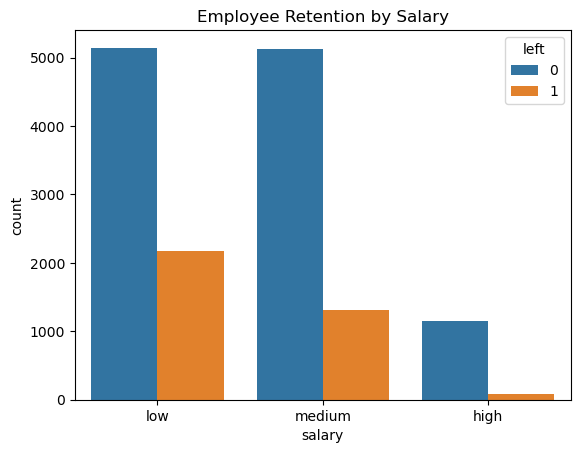

In [37]:
sns.countplot(data=df, x='salary', hue='left')
plt.title('Employee Retention by Salary')
plt.show()

Text(0.5, 1.0, 'Employee Retention by Department')

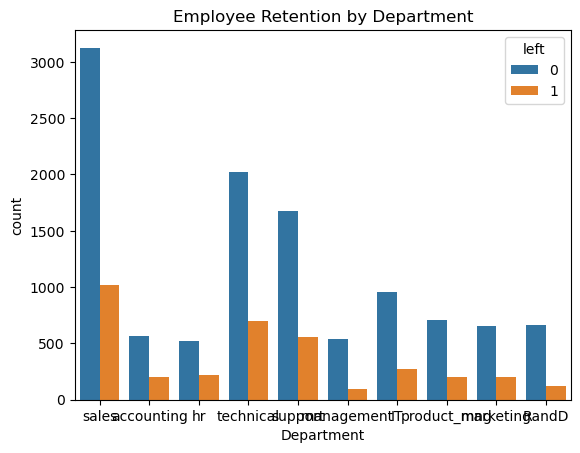

In [38]:
sns.countplot(data=df, x='Department', hue='left')
plt.title('Employee Retention by Department')

In [39]:
dummies=pd.get_dummies(df, columns=['salary', 'Department'],drop_first=True)
x = dummies.drop('left', axis=1)
y = dummies['left']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Sai Sushma Iska\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.coef_

array([[-4.23634451,  0.09606613, -0.31368911,  0.0048988 ,  0.25582806,
        -1.67509694, -0.66649209,  1.40749887,  0.89836866, -0.58791319,
         0.07049445,  0.38173725, -0.66582516,  0.08680533,  0.00565143,
         0.0081988 ,  0.22590221,  0.26028137]])

In [43]:
model.intercept_

array([-0.60908758])

In [44]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.7983
